In [1]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
img_path = r"E:\DataSets\carPlatesDataset\raw_plates"
output_img_path = r"E:\DataSets\carPlatesDataset\raw_letters\letters420"
train_df_path = "data/letters420/train_labels.csv"
#test_df_path = "data/on1000/test_labels_mod.csv"

In [3]:
train_df = pd.read_csv(train_df_path)
#test_df = pd.read_csv(test_df_path)

In [4]:
#df = train_df.append(test_df, ignore_index = True)
df = train_df

In [5]:
#df = pd.read_csv("data/on1000/all_train_mod.csv")

In [6]:
df.head()

,Unnamed: 0,filename,width,height,class,xmin,ymin,xmax,ymax
0,0,E:\DataSets\carPlatesDataset\raw_plates\IMG_20...,491,430,letter,395,211,474,325
1,1,E:\DataSets\carPlatesDataset\raw_plates\IMG_20...,491,430,letter,330,229,392,305
2,2,E:\DataSets\carPlatesDataset\raw_plates\IMG_20...,491,430,letter,252,218,314,311
3,3,E:\DataSets\carPlatesDataset\raw_plates\IMG_20...,491,430,letter,146,192,198,308
4,4,E:\DataSets\carPlatesDataset\raw_plates\IMG_20...,491,430,letter,94,192,131,307


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2560 non-null   int64 
 1   filename    2560 non-null   object
 2   width       2560 non-null   int64 
 3   height      2560 non-null   int64 
 4   class       2560 non-null   object
 5   xmin        2560 non-null   int64 
 6   ymin        2560 non-null   int64 
 7   xmax        2560 non-null   int64 
 8   ymax        2560 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 180.1+ KB


In [43]:
class img_cleaning:
    def __init__(self, df):
        self.df = df
        
        
    def get_cropped_img(self, i):
        img = cv2.imread(self.df['filename'][i])
        return img[self.df['ymin'][i]:self.df['ymax'][i], self.df['xmin'][i]:self.df['xmax'][i], :]
    
    def get_rotated_img(self, i):
        img = self.get_cropped_img(i)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #(thresh, im_bw) = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        edges = cv2.Canny(img_gray, 100, 200, None, 3)
        lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
        total_theta = []
        if lines is not None:
            for i in range(len(lines)):
                if (abs(lines[i][0][1]) < 0.45 or abs(lines[i][0][1] - np.pi) < 0.45):
                    continue
                else:
                    total_theta.append(lines[i][0][1])
            if len(total_theta) != 0:
                avg_theta = sum([theta for theta in total_theta])/len(total_theta) * (180/np.pi) - 90
            else:
                avg_theta = 0
            (h, w) = img.shape[:2]
            (cX, cY) = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D((cX, cY), avg_theta, 1.0)
            rotated = cv2.warpAffine(img, M, (w, h))
            #im_bw = cv2.threshold(image, thresh + 20, 255, cv2.THRESH_BINARY)[1]
            return rotated
        image = np.array(img_gray)
        #im_bw = cv2.threshold(image, thresh + 20, 255, cv2.THRESH_BINARY)[1]
        return img
    
    def get_resized_img(self, i):
        img = self.get_cropped_img(i)
        img = Image.fromarray(img)
        return np.array(img.resize((96, 96)))

In [44]:
imgs = img_cleaning(df)
j = 0
for i in range(len(df)):
    if i != 0: 
        if (df['filename'][i].split("\\")[-1][:-4] != df['filename'][i-1].split("\\")[-1][:-4]):
            j = 0
    cv2.imwrite(os.path.join(output_img_path, str(df['filename'][i].split("\\")[-1][:-4])+"_"+str(j)+".jpg"), imgs.get_resized_img(i))
    j+=1
    print(f"at file {i}, {i/len(df) * 100}% done")

at file 0, 0.0% done
at file 1, 0.0390625% done
at file 2, 0.078125% done
at file 3, 0.1171875% done
at file 4, 0.15625% done
at file 5, 0.1953125% done
at file 6, 0.234375% done
at file 7, 0.2734375% done
at file 8, 0.3125% done
at file 9, 0.3515625% done
at file 10, 0.390625% done
at file 11, 0.42968750000000006% done
at file 12, 0.46875% done
at file 13, 0.5078125% done
at file 14, 0.546875% done
at file 15, 0.5859375% done
at file 16, 0.625% done
at file 17, 0.6640625% done
at file 18, 0.703125% done
at file 19, 0.7421875% done
at file 20, 0.78125% done
at file 21, 0.8203125% done
at file 22, 0.8593750000000001% done
at file 23, 0.8984374999999999% done
at file 24, 0.9375% done
at file 25, 0.9765625% done
at file 26, 1.015625% done
at file 27, 1.0546875% done
at file 28, 1.09375% done
at file 29, 1.1328125% done
at file 30, 1.171875% done
at file 31, 1.2109375% done
at file 32, 1.25% done
at file 33, 1.2890625% done
at file 34, 1.328125% done
at file 35, 1.3671875% done
at file 36,

at file 394, 15.390625% done
at file 395, 15.4296875% done
at file 396, 15.46875% done
at file 397, 15.507812500000002% done
at file 398, 15.546874999999998% done
at file 399, 15.5859375% done
at file 400, 15.625% done
at file 401, 15.6640625% done
at file 402, 15.703125000000002% done
at file 403, 15.742187499999998% done
at file 404, 15.78125% done
at file 405, 15.8203125% done
at file 406, 15.859375% done
at file 407, 15.898437500000002% done
at file 408, 15.937499999999998% done
at file 409, 15.9765625% done
at file 410, 16.015625% done
at file 411, 16.0546875% done
at file 412, 16.09375% done
at file 413, 16.1328125% done
at file 414, 16.171875% done
at file 415, 16.2109375% done
at file 416, 16.25% done
at file 417, 16.2890625% done
at file 418, 16.328125% done
at file 419, 16.3671875% done
at file 420, 16.40625% done
at file 421, 16.4453125% done
at file 422, 16.484375% done
at file 423, 16.5234375% done
at file 424, 16.5625% done
at file 425, 16.6015625% done
at file 426, 16.64

at file 703, 27.4609375% done
at file 704, 27.500000000000004% done
at file 705, 27.5390625% done
at file 706, 27.578124999999996% done
at file 707, 27.6171875% done
at file 708, 27.65625% done
at file 709, 27.695312500000004% done
at file 710, 27.734375% done
at file 711, 27.773437499999996% done
at file 712, 27.8125% done
at file 713, 27.8515625% done
at file 714, 27.890625000000004% done
at file 715, 27.9296875% done
at file 716, 27.968749999999996% done
at file 717, 28.0078125% done
at file 718, 28.046875% done
at file 719, 28.085937500000004% done
at file 720, 28.125% done
at file 721, 28.164062499999996% done
at file 722, 28.203125% done
at file 723, 28.2421875% done
at file 724, 28.281250000000004% done
at file 725, 28.3203125% done
at file 726, 28.359374999999996% done
at file 727, 28.3984375% done
at file 728, 28.4375% done
at file 729, 28.476562500000004% done
at file 730, 28.515625% done
at file 731, 28.554687499999996% done
at file 732, 28.59375% done
at file 733, 28.632812

at file 1072, 41.875% done
at file 1073, 41.9140625% done
at file 1074, 41.953125% done
at file 1075, 41.9921875% done
at file 1076, 42.03125% done
at file 1077, 42.0703125% done
at file 1078, 42.109375% done
at file 1079, 42.1484375% done
at file 1080, 42.1875% done
at file 1081, 42.2265625% done
at file 1082, 42.265625% done
at file 1083, 42.3046875% done
at file 1084, 42.34375% done
at file 1085, 42.3828125% done
at file 1086, 42.421875% done
at file 1087, 42.4609375% done
at file 1088, 42.5% done
at file 1089, 42.5390625% done
at file 1090, 42.578125% done
at file 1091, 42.6171875% done
at file 1092, 42.65625% done
at file 1093, 42.6953125% done
at file 1094, 42.734375% done
at file 1095, 42.7734375% done
at file 1096, 42.8125% done
at file 1097, 42.8515625% done
at file 1098, 42.890625% done
at file 1099, 42.9296875% done
at file 1100, 42.96875% done
at file 1101, 43.0078125% done
at file 1102, 43.046875% done
at file 1103, 43.0859375% done
at file 1104, 43.125% done
at file 1105,

at file 1451, 56.6796875% done
at file 1452, 56.71874999999999% done
at file 1453, 56.75781250000001% done
at file 1454, 56.796875% done
at file 1455, 56.8359375% done
at file 1456, 56.875% done
at file 1457, 56.91406249999999% done
at file 1458, 56.95312500000001% done
at file 1459, 56.9921875% done
at file 1460, 57.03125% done
at file 1461, 57.0703125% done
at file 1462, 57.10937499999999% done
at file 1463, 57.14843750000001% done
at file 1464, 57.1875% done
at file 1465, 57.2265625% done
at file 1466, 57.265625% done
at file 1467, 57.30468749999999% done
at file 1468, 57.34375000000001% done
at file 1469, 57.3828125% done
at file 1470, 57.421875% done
at file 1471, 57.4609375% done
at file 1472, 57.49999999999999% done
at file 1473, 57.53906250000001% done
at file 1474, 57.578125% done
at file 1475, 57.6171875% done
at file 1476, 57.65625% done
at file 1477, 57.69531249999999% done
at file 1478, 57.73437500000001% done
at file 1479, 57.7734375% done
at file 1480, 57.8125% done
at f

at file 1729, 67.5390625% done
at file 1730, 67.578125% done
at file 1731, 67.6171875% done
at file 1732, 67.65625% done
at file 1733, 67.6953125% done
at file 1734, 67.734375% done
at file 1735, 67.7734375% done
at file 1736, 67.8125% done
at file 1737, 67.8515625% done
at file 1738, 67.890625% done
at file 1739, 67.9296875% done
at file 1740, 67.96875% done
at file 1741, 68.0078125% done
at file 1742, 68.046875% done
at file 1743, 68.0859375% done
at file 1744, 68.125% done
at file 1745, 68.1640625% done
at file 1746, 68.203125% done
at file 1747, 68.2421875% done
at file 1748, 68.28125% done
at file 1749, 68.3203125% done
at file 1750, 68.359375% done
at file 1751, 68.3984375% done
at file 1752, 68.4375% done
at file 1753, 68.4765625% done
at file 1754, 68.515625% done
at file 1755, 68.5546875% done
at file 1756, 68.59375% done
at file 1757, 68.6328125% done
at file 1758, 68.671875% done
at file 1759, 68.7109375% done
at file 1760, 68.75% done
at file 1761, 68.7890625% done
at file 

at file 2005, 78.3203125% done
at file 2006, 78.359375% done
at file 2007, 78.3984375% done
at file 2008, 78.4375% done
at file 2009, 78.4765625% done
at file 2010, 78.515625% done
at file 2011, 78.5546875% done
at file 2012, 78.59375% done
at file 2013, 78.6328125% done
at file 2014, 78.671875% done
at file 2015, 78.7109375% done
at file 2016, 78.75% done
at file 2017, 78.7890625% done
at file 2018, 78.828125% done
at file 2019, 78.8671875% done
at file 2020, 78.90625% done
at file 2021, 78.9453125% done
at file 2022, 78.984375% done
at file 2023, 79.0234375% done
at file 2024, 79.0625% done
at file 2025, 79.1015625% done
at file 2026, 79.140625% done
at file 2027, 79.1796875% done
at file 2028, 79.21875% done
at file 2029, 79.2578125% done
at file 2030, 79.296875% done
at file 2031, 79.3359375% done
at file 2032, 79.375% done
at file 2033, 79.4140625% done
at file 2034, 79.453125% done
at file 2035, 79.4921875% done
at file 2036, 79.53125% done
at file 2037, 79.5703125% done
at file 

at file 2323, 90.7421875% done
at file 2324, 90.78125% done
at file 2325, 90.8203125% done
at file 2326, 90.859375% done
at file 2327, 90.8984375% done
at file 2328, 90.9375% done
at file 2329, 90.9765625% done
at file 2330, 91.015625% done
at file 2331, 91.0546875% done
at file 2332, 91.09375% done
at file 2333, 91.1328125% done
at file 2334, 91.171875% done
at file 2335, 91.2109375% done
at file 2336, 91.25% done
at file 2337, 91.2890625% done
at file 2338, 91.328125% done
at file 2339, 91.3671875% done
at file 2340, 91.40625% done
at file 2341, 91.4453125% done
at file 2342, 91.484375% done
at file 2343, 91.5234375% done
at file 2344, 91.5625% done
at file 2345, 91.6015625% done
at file 2346, 91.640625% done
at file 2347, 91.6796875% done
at file 2348, 91.71875% done
at file 2349, 91.7578125% done
at file 2350, 91.796875% done
at file 2351, 91.8359375% done
at file 2352, 91.875% done
at file 2353, 91.9140625% done
at file 2354, 91.953125% done
at file 2355, 91.9921875% done
at file 

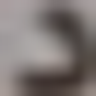

In [40]:
imgs = img_cleaning(df)
imgs.get_resized_img(19)
#plt.imshow(imgs.get_cropped_img(16))

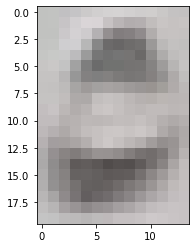

In [10]:
plt.imshow(img_cleaning(df).get_rotated_img(49))

In [10]:
df['filename'][i].split("\\")[-1][:-4]

'IMG_20220411_101921'

In [11]:
str(df['filename'][i].split("\\")[-1][-4])+"_"+str(j)+".jpg"

'._5.jpg'